# Covid-19 Exploratory Data Analysis


Preprocessed Dataset Link: https://github.com/jimcrews/Covid-19-Preprocessed-Dataset


In [1]:
# plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio

#py.offline.init_notebook_mode()

# folium imports
import folium

# standard pandas imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math
import random
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

# color pallette we will be using
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

## Data Preparation

In [2]:
df = pd.read_csv('Raw_Data/covid_19_data_cleaned.csv', parse_dates=['Date'])

country_daywise = pd.read_csv('Raw_Data/covid_19_country_daywise.csv', parse_dates=['Date'])
countrywise = pd.read_csv('Raw_Data/covid_19_countrywise.csv')
daywise = pd.read_csv('Raw_Data/covid_19_daywise.csv', parse_dates=['Date'])

In [3]:
country_daywise.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Deaths,New Recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0


In [4]:
df['Province/State'] = df['Province/State'].fillna("")
df

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,,Afghanistan,33.93911,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...,...
77251,2020-10-04,,Timor-Leste,-8.87420,125.727500,0,28,0,-28
77252,2020-10-05,,Timor-Leste,-8.87420,125.727500,0,28,0,-28
77253,2020-10-06,,Timor-Leste,-8.87420,125.727500,0,28,0,-28
77254,2020-10-07,,Timor-Leste,-8.87420,125.727500,0,28,0,-28


In [5]:
# group by day, across all countries, get the totals
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
256,2020-10-04,1037083
257,2020-10-05,1044090
258,2020-10-06,1049875
259,2020-10-07,1055683


In [6]:
# are there any nulls ?

df.isnull().sum()

Date              0
Province/State    0
Country           0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
Active            0
dtype: int64

In [7]:
# column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77256 entries, 0 to 77255
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            77256 non-null  datetime64[ns]
 1   Province/State  77256 non-null  object        
 2   Country         77256 non-null  object        
 3   Lat             77256 non-null  float64       
 4   Long            77256 non-null  float64       
 5   Confirmed       77256 non-null  int64         
 6   Recovered       77256 non-null  int64         
 7   Deaths          77256 non-null  int64         
 8   Active          77256 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 5.3+ MB


In [8]:
# query by country

df.query('Country == "Australia"')

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
2088,2020-01-22,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0
2089,2020-01-23,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0
2090,2020-01-24,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0
2091,2020-01-25,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0
2092,2020-01-26,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4171,2020-10-04,Western Australia,Australia,-31.9505,115.8605,686,660,9,17
4172,2020-10-05,Western Australia,Australia,-31.9505,115.8605,687,662,9,16
4173,2020-10-06,Western Australia,Australia,-31.9505,115.8605,687,664,9,14
4174,2020-10-07,Western Australia,Australia,-31.9505,115.8605,690,670,9,11


## Worldwide Total Confirmed, Recovered, and Deaths

In [9]:
confirmed.tail()

,Date,Confirmed
256,2020-10-04,35153599
257,2020-10-05,35479051
258,2020-10-06,35806972
259,2020-10-07,36156226
260,2020-10-08,36515563


In [10]:
recovered.tail()

,Date,Recovered
256,2020-10-04,24510831
257,2020-10-05,24749718
258,2020-10-06,24981297
259,2020-10-07,25236697
260,2020-10-08,25456143


In [11]:
deaths.tail()

,Date,Deaths
256,2020-10-04,1037083
257,2020-10-05,1044090
258,2020-10-06,1049875
259,2020-10-07,1055683
260,2020-10-08,1061877


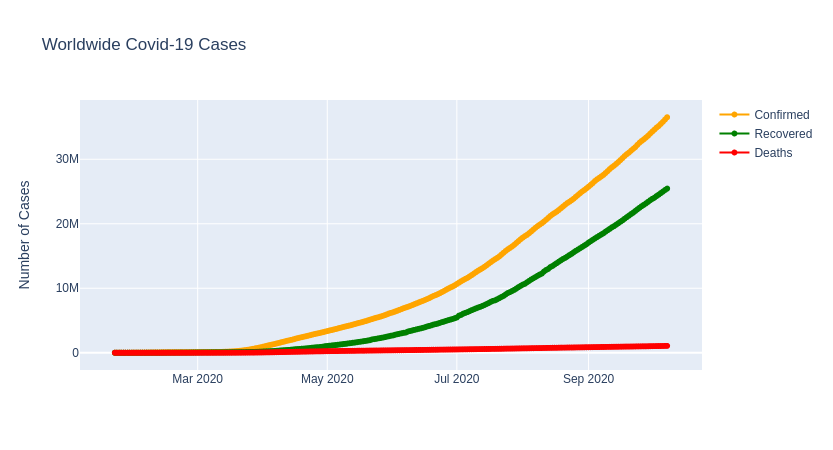

In [24]:
# plotly

fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'], y= confirmed['Confirmed'], mode='lines+markers', name='Confirmed', line= dict(color="Orange")))
fig.add_trace(go.Scatter(x = recovered['Date'], y= recovered['Recovered'], mode='lines+markers', name='Recovered', line= dict(color="Green")))
fig.add_trace(go.Scatter(x = deaths['Date'], y= deaths['Deaths'], mode='lines+markers', name='Deaths', line= dict(color="Red")))
fig.update_layout(title="Worldwide Covid-19 Cases", yaxis = dict(title = "Number of Cases"))
fig.show()